### 模块初始化

In [33]:
# Import packages
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

# Enable GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

### 构建数据集读取器

In [34]:
class MNISTReader(datasets.VisionDataset):
    def __init__(self, path) -> None:
        self.data_label = torch.load(path)
        self.transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=1),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.5], std=[0.5])
        ])

    def __len__(self) -> int:
        return 20000

    def __getitem__(self, index):
        image, target = self.data_label[index]
        return self.transform(image), target

### 构建分类神经网络模型

In [35]:
class MNISTModel(nn.Module):
    def __init__(self):
        super(MNISTModel, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(3136, 1024),
            nn.Linear(1024, 10),
            nn.Linear(10, 2)
        )

    def forward(self, x):
        x = self.model(x)
        return x

### 载入数据集

In [36]:
# Dataset train1
train1_dataset = MNISTReader('./ColoredMNIST/train1.pt')
train1_loader = DataLoader(train1_dataset, batch_size=32)
train1_size = len(train1_dataset)
print("Dataset train1 loaded, size = {}".format(train1_size))

# Dataset train2
train2_dataset = MNISTReader('./ColoredMNIST/train2.pt')
train2_loader = DataLoader(train2_dataset, batch_size=32)
train2_size = len(train2_dataset)
print("Dataset train2 loaded, size = {}".format(train2_size))

# Dataset test
test_dataset = MNISTReader('./ColoredMNIST/test.pt')
test_loader = DataLoader(test_dataset, batch_size=32)
test_size = len(test_dataset)
print("Dataset test loaded, size = {}".format(test_size))

Dataset train1 loaded, size = 20000
Dataset train2 loaded, size = 20000
Dataset test loaded, size = 20000


### 在训练集 `train1.pt` 上训练模型

In [37]:
# Model parameters
train1_model = MNISTModel().to(device)
train1_loss_function = nn.CrossEntropyLoss().to(device)
train1_learning_rate = 0.01
train1_optimizer = optim.Adam(train1_model.parameters(), lr=train1_learning_rate)
train1_accuracy = []

# Training parameters
total_epoch = 10
current_progress = 0

for epoch in range(total_epoch):
    print("---------- Training round {} started ----------".format(epoch + 1))

    # Train
    train1_model.train()
    for inputs, targets in train1_loader:
        # Enable GPU
        inputs, targets = inputs.to(device), targets.to(device)
        # Forward propagation
        outputs = train1_model(inputs)
        loss = train1_loss_function(outputs, targets)
        # Backward propagation
        train1_optimizer.zero_grad()
        loss.backward()
        train1_optimizer.step()
        # Record progress
        current_progress += 1
        if current_progress % 100 == 0:
            print("Training progress: {}, Loss: {}".format(current_progress, loss.item()))

    # Test
    train1_model.eval()
    total_loss = 0.0
    total_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            # Enable GPU
            inputs, targets = inputs.to(device), targets.to(device)
            # Make perdiction
            outputs = train1_model(inputs)
            # Calculate loss
            loss = train1_loss_function(outputs, targets)
            total_loss += loss
            # Calculate accuracy
            correct = (outputs.argmax(1) == targets).sum()
            total_correct += correct
    # Record accuracy
    accuracy = total_correct / test_size
    train1_accuracy.append(accuracy.item())
    print("Total loss: {}, Accuracy: {}".format(total_loss, accuracy.item()))

    print("---------- Training round {} finished ----------".format(epoch + 1))

---------- Training round 1 started ----------
Training progress: 100, Loss: 0.42508256435394287
Training progress: 200, Loss: 0.34051600098609924
Training progress: 300, Loss: 0.6473428606987
Training progress: 400, Loss: 0.5770722031593323
Training progress: 500, Loss: 0.4550929367542267
Training progress: 600, Loss: 0.4551681578159332
Total loss: 731.3696899414062, Accuracy: 0.14309999346733093
---------- Training round 1 finished ----------
---------- Training round 2 started ----------
Training progress: 700, Loss: 0.3683050870895386
Training progress: 800, Loss: 0.7079054117202759
Training progress: 900, Loss: 0.6171107888221741
Training progress: 1000, Loss: 0.5512687563896179
Training progress: 1100, Loss: 0.5211177468299866
Training progress: 1200, Loss: 0.541061282157898
Total loss: 727.6994018554688, Accuracy: 0.17520000040531158
---------- Training round 2 finished ----------
---------- Training round 3 started ----------
Training progress: 1300, Loss: 0.5683028101921082
Tr

### 在训练集 `train2.pt` 上训练模型

In [38]:
# Model parameters
train2_model = MNISTModel().to(device)
train2_loss_function = nn.CrossEntropyLoss().to(device)
train2_learning_rate = 0.01
train2_optimizer = optim.SGD(train2_model.parameters(), lr=train2_learning_rate)
train2_accuracy = []

# Training parameters
total_epoch = 10
current_progress = 0

for epoch in range(total_epoch):
    print("---------- Training round {} started ----------".format(epoch + 1))

    # Train
    train2_model.train()
    for inputs, targets in train2_loader:
        # Enable GPU
        inputs, targets = inputs.to(device), targets.to(device)
        # Forward propagation
        outputs = train2_model(inputs)
        loss = train2_loss_function(outputs, targets)
        # Backward propagation
        train2_optimizer.zero_grad()
        loss.backward()
        train2_optimizer.step()
        # Record progress
        current_progress += 1
        if current_progress % 100 == 0:
            print("Training progress: {}, Loss: {}".format(current_progress, loss.item()))

    # Test
    train2_model.eval()
    total_loss = 0.0
    total_correct = 0
    with torch.no_grad():
        for inputs, targets in test_loader:
            # Enable GPU
            inputs, targets = inputs.to(device), targets.to(device)
            # Make perdiction
            outputs = train2_model(inputs)
            # Calculate loss
            loss = train2_loss_function(outputs, targets)
            total_loss += loss
            # Calculate accuracy
            correct = (outputs.argmax(1) == targets).sum()
            total_correct += correct
    # Record accuracy
    accuracy = total_correct / test_size
    train2_accuracy.append(accuracy.item())
    print("Total loss: {}, Accuracy: {}".format(total_loss, accuracy.item()))

    print("---------- Training round {} finished ----------".format(epoch + 1))

---------- Training round 1 started ----------
Training progress: 100, Loss: 0.4447924494743347
Training progress: 200, Loss: 0.39570069313049316
Training progress: 300, Loss: 0.3407565951347351
Training progress: 400, Loss: 0.399040162563324
Training progress: 500, Loss: 0.42146843671798706
Training progress: 600, Loss: 0.27119630575180054
Total loss: 1136.679931640625, Accuracy: 0.12024999409914017
---------- Training round 1 finished ----------
---------- Training round 2 started ----------
Training progress: 700, Loss: 0.2596578001976013
Training progress: 800, Loss: 0.2789671719074249
Training progress: 900, Loss: 0.1873481422662735
Training progress: 1000, Loss: 0.15490418672561646
Training progress: 1100, Loss: 0.4919430613517761
Training progress: 1200, Loss: 0.32509228587150574
Total loss: 1144.2132568359375, Accuracy: 0.11459999531507492
---------- Training round 2 finished ----------
---------- Training round 3 started ----------
Training progress: 1300, Loss: 0.359269738197

### 绘制学习曲线

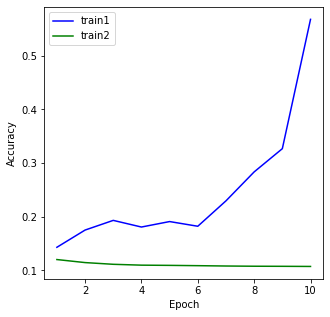

In [39]:
# Generate data points
x = np.linspace(1, 10, 10, dtype=np.int_)
y1 = np.array(train1_accuracy)
y2 = np.array(train2_accuracy)

# Plot learning curve
plt.figure(figsize=(5, 5))
plt.plot(x, y1, c='b', label='train1')
plt.plot(x, y2, c='g', label='train2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()